### Evaluating customer conversion rate 
**This analysis looks at the success rate of a bank's campaign to sign in term-deposit clients. Using it to predict the likelihood of existing clients signing in to the product in the future**

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [21]:
df = pd.read_csv("bank.csv")

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [13]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [14]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [17]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [18]:
df.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [19]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [24]:
# how to check only the clients that had "success"?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             11162 non-null  int64 
 1   balance         11162 non-null  int64 
 2   day             11162 non-null  int64 
 3   month           11162 non-null  object
 4   duration        11162 non-null  int64 
 5   campaign        11162 non-null  int64 
 6   pdays           11162 non-null  int64 
 7   previous        11162 non-null  int64 
 8   admin.          11162 non-null  uint8 
 9   blue-collar     11162 non-null  uint8 
 10  entrepreneur    11162 non-null  uint8 
 11  housemaid       11162 non-null  uint8 
 12  management      11162 non-null  uint8 
 13  retired         11162 non-null  uint8 
 14  self-employed   11162 non-null  uint8 
 15  services        11162 non-null  uint8 
 16  student         11162 non-null  uint8 
 17  technician      11162 non-null  uint8 
 18  unempl

In [12]:
type(df["month"])

pandas.core.series.Series

### Create dummy variables

In [22]:
job_dummies = pd.get_dummies(df["job"], prefix = "job = ")
df = pd.concat([df, job_dummies], axis=1)
df = df.drop("job", axis = 1)

marital_dummies = pd.get_dummies(df["marital"], prefix = "marital_status = ")
df = pd.concat([df, marital_dummies], axis=1)
df = df.drop("marital", axis = 1)

education_dummies = pd.get_dummies(df["education"], prefix = "education = ")
df = pd.concat([df, education_dummies], axis=1)
df = df.drop("education", axis = 1)

contact_dummies = pd.get_dummies(df["contact"], prefix = "contact = ")
df = pd.concat([df, contact_dummies], axis=1)
df = df.drop("contact", axis = 1)

poutcome_dummies = pd.get_dummies(df["poutcome"], prefix = "previous_outcome = ")
df = pd.concat([df, poutcome_dummies], axis=1)
df = df.drop("poutcome", axis = 1)
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education = _secondary,education = _tertiary,education = _unknown,contact = _cellular,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown
0,59,no,2343,yes,no,5,may,1042,1,-1,...,1,0,0,0,0,1,0,0,0,1
1,56,no,45,no,no,5,may,1467,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,41,no,1270,yes,no,5,may,1389,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,55,no,2476,yes,no,5,may,579,1,-1,...,1,0,0,0,0,1,0,0,0,1
4,54,no,184,no,no,5,may,673,2,-1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,no,1,yes,no,20,apr,257,1,-1,...,0,0,0,1,0,0,0,0,0,1
11158,39,no,733,no,no,16,jun,83,4,-1,...,1,0,0,0,0,1,0,0,0,1
11159,32,no,29,no,no,19,aug,156,2,-1,...,1,0,0,1,0,0,0,0,0,1
11160,43,no,0,no,yes,8,may,9,2,172,...,1,0,0,1,0,0,1,0,0,0


In [23]:
# transform default/housing/loan/deposit to 0 and 1

from sklearn.preprocessing import LabelEncoder

credit_default = LabelEncoder()
credit_default.fit(df["default"])

df["credit_default"] = credit_default.transform(df["default"])
df = df.drop("default", axis = 1)


house_loan = LabelEncoder()
house_loan.fit(df["housing"])

df["house_loan"] = house_loan.transform(df["housing"])
df = df.drop("housing", axis = 1)


personal_loan = LabelEncoder()
personal_loan.fit(df["loan"])

df["personal_loan"] = personal_loan.transform(df["loan"])
df = df.drop("loan", axis = 1)


term_deposit = LabelEncoder()
term_deposit.fit(df["deposit"])

df["term_deposit"] = term_deposit.transform(df["deposit"])
df = df.drop("deposit", axis = 1)
df

,age,balance,day,month,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,...,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit
0,59,2343,5,may,1042,1,-1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
1,56,45,5,may,1467,1,-1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,41,1270,5,may,1389,1,-1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
3,55,2476,5,may,579,1,-1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,54,184,5,may,673,2,-1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,apr,257,1,-1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
11158,39,733,16,jun,83,4,-1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11159,32,29,19,aug,156,2,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11160,43,0,8,may,9,2,172,5,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
# change month to numeric/int

from datetime import datetime
from datetime import timedelta

#df['month'] = pd.to_datetime(df['month'], format='%m')

#df

In [48]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,...,telephone,unknown,failure,other,success,unknown,credit_default,house_loan,personal_loan,term_deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.119513,0.174162,0.029385,...,0.069342,0.210177,0.110016,0.048110,0.095951,0.745924,0.015051,0.473123,0.130801,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.324405,0.379266,0.168892,...,0.254047,0.407453,0.312924,0.214008,0.294537,0.435360,0.121761,0.499299,0.337198,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#corrMatrix = df.corr()
#corrMatrix

<AxesSubplot:>

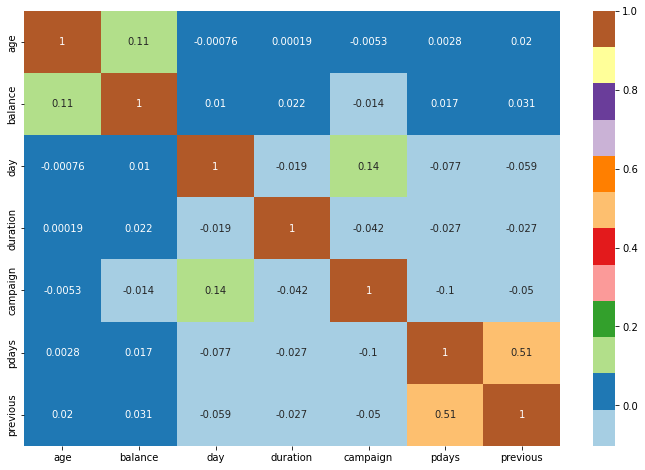

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(corrMatrix, annot = True, cmap= 'Paired')

<AxesSubplot:xlabel='deposit', ylabel='balance'>

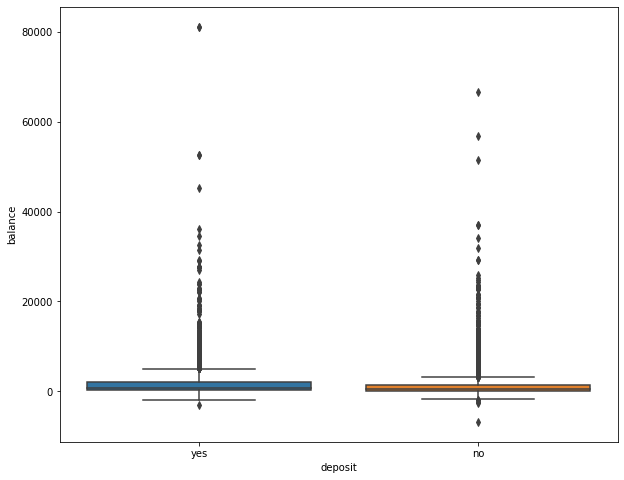

In [36]:
plt.figure(figsize = (10, 8))
sns.boxplot(x=df["deposit"], y=df["balance"])